In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score

(1143, 13)


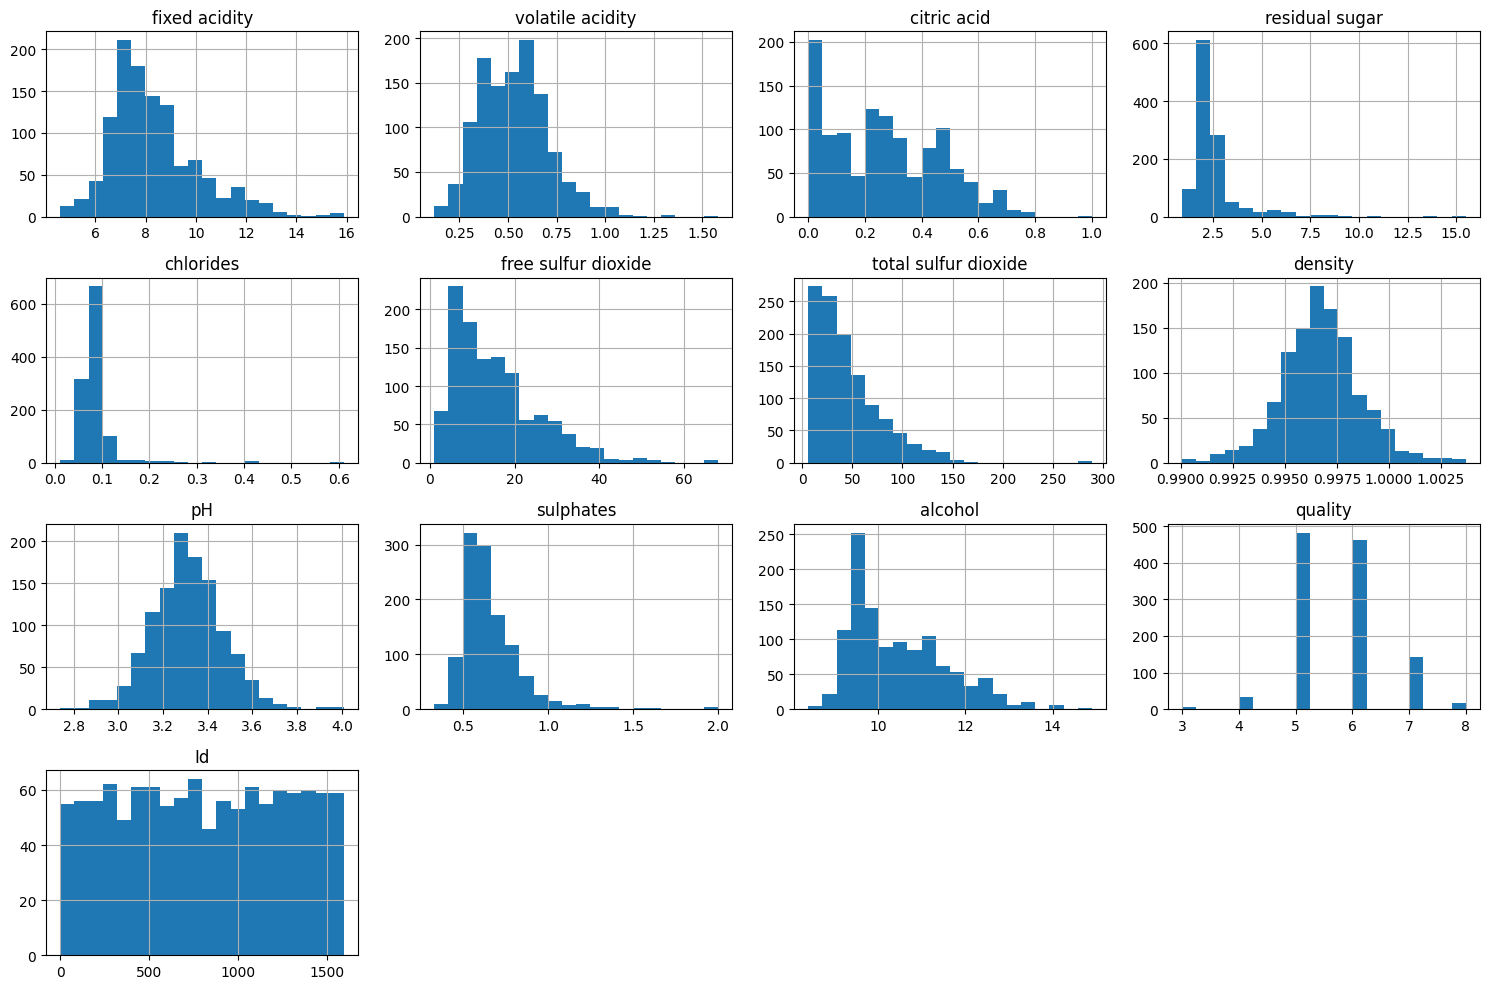

                            mean  standard_deviation         max      min
fixed acidity           8.311111            1.746830    15.90000  4.60000
volatile acidity        0.531339            0.179555     1.58000  0.12000
citric acid             0.268364            0.196600     1.00000  0.00000
residual sugar          2.532152            1.355324    15.50000  0.90000
chlorides               0.086933            0.047247     0.61100  0.01200
free sulfur dioxide    15.615486           10.246001    68.00000  1.00000
total sulfur dioxide   45.914698           32.767787   289.00000  6.00000
density                 0.996730            0.001924     1.00369  0.99007
pH                      3.311015            0.156596     4.01000  2.74000
sulphates               0.657708            0.170324     2.00000  0.33000
alcohol                10.442111            1.081722    14.90000  8.40000
quality                 5.657043            0.805472     8.00000  3.00000
Id                    804.969379      

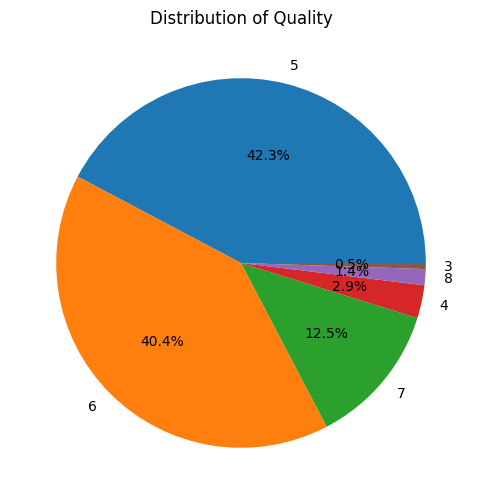

In [2]:
data = pd.read_csv('WineQT.csv')
# print(data)
print(data.shape)
# Describe the dataset
description = data.describe()

# Draw a histogram for each attribute
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
tuples = []
for column in data.columns:
    column_data = data[column]
    mean = np.mean(column_data)
    min = np.min(column_data)
    max = np.max(column_data)
    standard_deviation = np.std(column_data)
    tuples.append((mean,standard_deviation,max,min))

# df_metrics = pd.DataFrame(tuples,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id'])
df_metrics = pd.DataFrame(tuples, columns=['mean', 'standard_deviation', 'max', 'min'], index=data.columns)
print(df_metrics)
# Draw a pie chart for the 'quality' attribute
quality_counts = data['quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Quality')
plt.show()

# Multi Layer Perceptron Classification in Python from Scratch

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

(1143, 13)


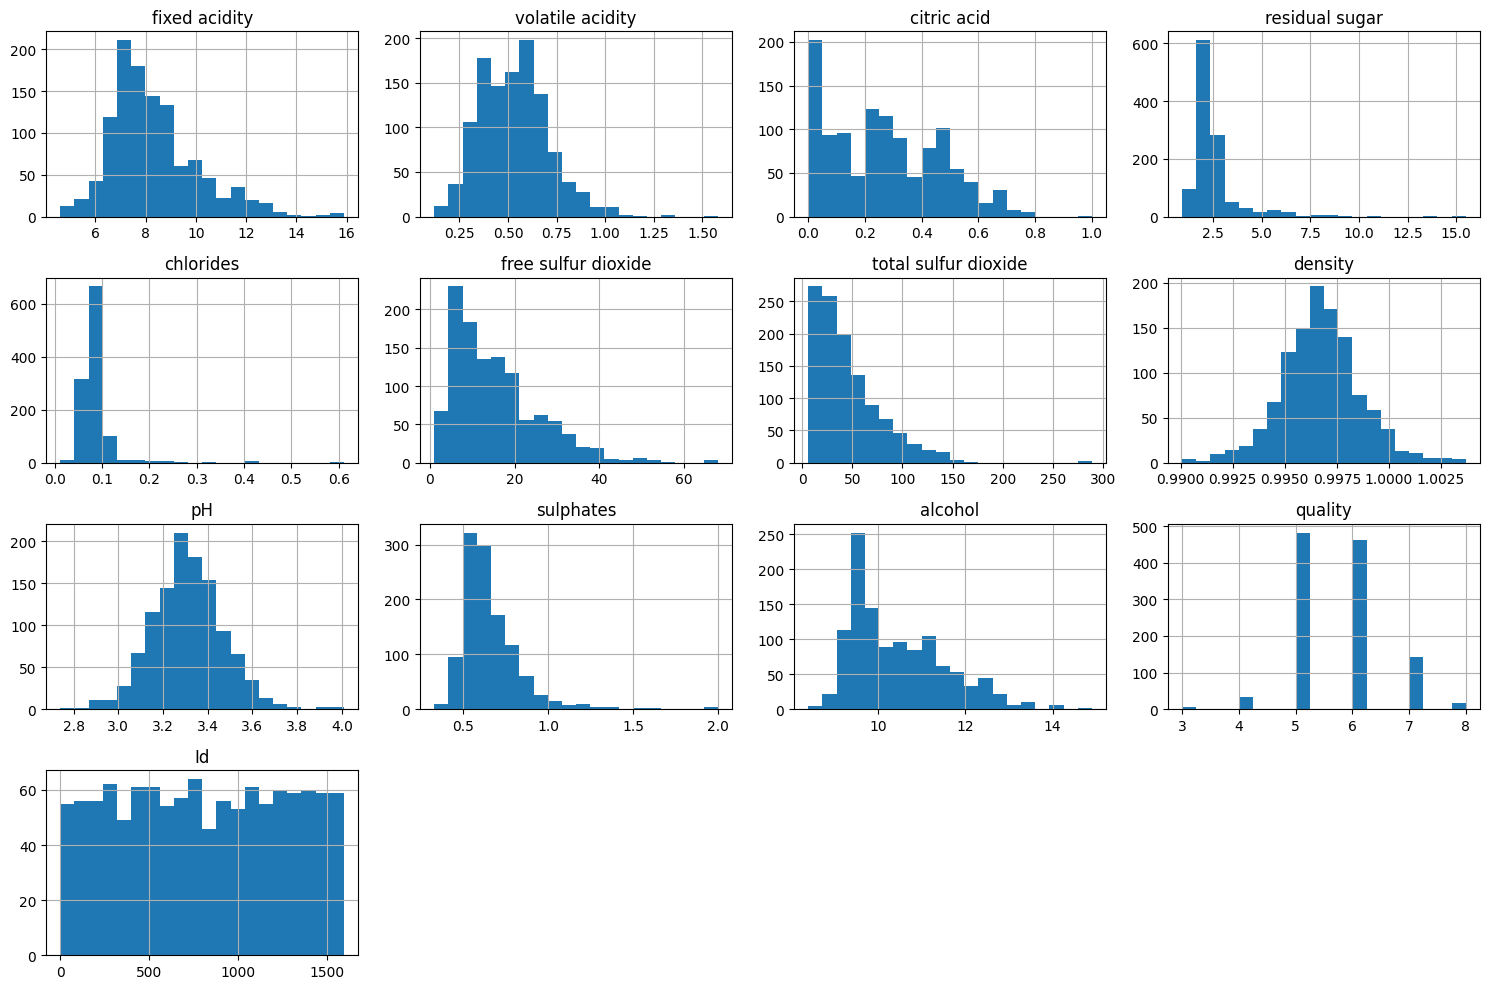

                            mean  standard_deviation         max      min
fixed acidity           8.311111            1.746830    15.90000  4.60000
volatile acidity        0.531339            0.179555     1.58000  0.12000
citric acid             0.268364            0.196600     1.00000  0.00000
residual sugar          2.532152            1.355324    15.50000  0.90000
chlorides               0.086933            0.047247     0.61100  0.01200
free sulfur dioxide    15.615486           10.246001    68.00000  1.00000
total sulfur dioxide   45.914698           32.767787   289.00000  6.00000
density                 0.996730            0.001924     1.00369  0.99007
pH                      3.311015            0.156596     4.01000  2.74000
sulphates               0.657708            0.170324     2.00000  0.33000
alcohol                10.442111            1.081722    14.90000  8.40000
quality                 5.657043            0.805472     8.00000  3.00000
Id                    804.969379      

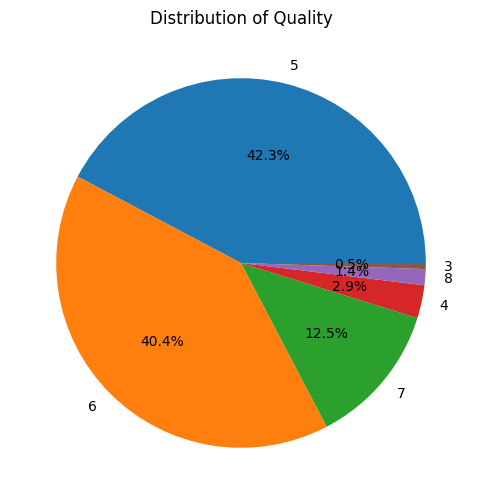

In [25]:
data = pd.read_csv('WineQT.csv')
# print(data)
print(data.shape)
# Describe the dataset
description = data.describe()

# Draw a histogram for each attribute
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
tuples = []
for column in data.columns:
    column_data = data[column]
    mean = np.mean(column_data)
    min = np.min(column_data)
    max = np.max(column_data)
    standard_deviation = np.std(column_data)
    tuples.append((mean,standard_deviation,max,min))

# df_metrics = pd.DataFrame(tuples,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id'])
df_metrics = pd.DataFrame(tuples, columns=['mean', 'standard_deviation', 'max', 'min'], index=data.columns)
print(df_metrics)
# Draw a pie chart for the 'quality' attribute
quality_counts = data['quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Quality')
plt.show()

# Multi Layer Perceptron Classification in Python from Scratch

In [26]:
X = data.drop(['quality'], axis=1)  # Remove 'quality' and 'Id' columns from features
y = data['quality']  # Target variable
y = np.array(pd.get_dummies(y).astype(int))
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize and standardize the data
scaler = StandardScaler()
X_train_std = np.array(scaler.fit_transform(X_train))
X_val_std = np.array(scaler.transform(X_val))
X_test_std = np.array(scaler.transform(X_test))



min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_val_norm = min_max_scaler.transform(X_val)
X_test_norm = min_max_scaler.transform(X_test)

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]


In [6]:
import wandb
wandb.login()
wandb.init(project="MultiLayer-Perceptron-Classification")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: rohitgowlapalli01. Use `wandb login --relogin` to force relogin


In [54]:
import numpy as np
import matplotlib.pyplot as plt

class MultiLayerPerceptronClassification:
    def __init__(self, input_layer_size, num_hidden_layers, hidden_layer_size, output_layer_size, learning_rate=0.001, activation_type='sigmoid', optimizer_type='batch',max_iterations=10000):
        self.learning_rate = learning_rate
        self.input_layer_size = input_layer_size
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.activation_type = activation_type
        self.optimizer_type = optimizer_type
        self.weights = self.initialize_weights()
        self.yHat = None
        self.activation_function = self.sigmoid
        self.activation_prime_function = self.sigmoid_prime
        self.max_iterations = max_iterations
        self.train_function = self.train_mini_batch
        self.wandlog = False

    def initialize_weights(self):
        weights = []
        layer_sizes = [self.input_layer_size] + [self.hidden_layer_size] * self.num_hidden_layers + [self.output_layer_size]
        for i in range(1, len(layer_sizes)):
            weights.append(np.random.randn(layer_sizes[i - 1], layer_sizes[i]))
        return weights

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_prime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def tanh(self, z):
        return np.tanh(z)

    def tanh_prime(self, z):
        return 1 - np.square(np.tanh(z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_prime(self, z):
        return (z > 0).astype(int)

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_activation_type(self, activation_type):
        self.activation_type = activation_type
        self.set_activation_function()

    def set_optimizer_type(self, optimizer_type):
        self.optimizer_type = optimizer_type
        self.set_train_function()

    def set_activation_function(self):
        if self.activation_type == 'sigmoid':
            self.activation_function = self.sigmoid
            self.activation_prime_function = self.sigmoid_prime
        elif self.activation_type == 'relu':
            self.activation_function = self.relu
            self.activation_prime_function = self.relu_prime
        elif self.activation_type == 'tanh':
            self.activation_function = self.tanh
            self.activation_prime_function = self.tanh_prime

    def set_train_function(self):
        if self.optimizer_type == 'SGD':
            self.train_function = self.train_sgd
        elif self.optimizer_type == 'mini':
            self.train_function = self.train_mini_batch
        elif self.optimizer_type == 'batch':
            self.train_function = self.train_batch

    def set_hidden_layers(self,num_hidden_layers,hidden_layer_size):
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.weights = self.initialize_weights()

    def set_epochs(self,epochs):
        self.max_iterations = epochs

    def set_wandb(self,state):
        self.wandlog = state

    def forward_propagation(self, X):
        A = [X]
        Z = []
        for layer in range(0, self.num_hidden_layers):
            z = np.dot(A[layer], self.weights[layer])
            a = self.activation_function(z)
            Z.append(z)
            A.append(a)
        z = np.dot(A[self.num_hidden_layers],self.weights[self.num_hidden_layers])
        Z.append(z)
        self.yHat = self.softmax(Z[-1])
        A.append(self.yHat)
        self.activations = A
        self.weighted_sums = Z
        return self.yHat

    def backward_propagation(self, x, y):
        m = x.shape[0]
        output_error = np.multiply((self.activations[-1] - y),self.sigmoid_prime(self.weighted_sums[-1]))
        deltas = [output_error]
        for i in reversed(range(self.num_hidden_layers)):
            error = deltas[-1].dot(self.weights[i + 1].T)
            delta = error*self.activation_prime_function(self.weighted_sums[i])
            deltas.append(delta)
        deltas = list(reversed(deltas))
        gradients = []
        for i in range(self.num_hidden_layers + 1):
            gradient = self.activations[i].T.dot(deltas[i])
            gradients.append(gradient)
        return gradients
    

    def softmax(self, z):
        return np.exp(z - np.max(z)) / np.exp(z - np.max(z)).sum(axis=1, keepdims=True)
    
    def costFunction(self, X, y):
        self.y_Hat = self.forward_propagation(X)
        J = -np.sum(y*np.log(self.y_Hat))/len(X)
        return J

    def get_params(self):
        params = []
        for weight_matrix in self.weights:
            params.append(weight_matrix.ravel())
        return np.concatenate(params)

    def set_params(self, params):
        param_start = 0
        for i in range(len(self.weights)):
            weight_shape = self.weights[i].shape
            weight_size = weight_shape[0] * weight_shape[1]
            self.weights[i] = params[param_start:param_start + weight_size].reshape(weight_shape)
            param_start += weight_size

    def compute_gradients(self, X, y):
        self.forward_propagation(X)
        gradients = self.backward_propagation(X, y)
        gradient_params = []
        for weight_gradient in gradients:
            gradient_params.append(weight_gradient.ravel())
        return np.concatenate(gradient_params)

    def train_batch(self, X, y, learning_rate=0.01, max_iterations=10000):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        loss = self.costFunction(X, y)
        print('Initial Loss',loss)
        # wandb.log({"Batch-loss": loss})
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            gradients = self.compute_gradients(X, y)
            loss = self.costFunction(X, y)
            self.J.append(loss)
            self.set_params(self.get_params() - lr * gradients)
            k += 1
            # if k % 250 == 0:
            #     print("Epoch %d: loss = %f" % (k, loss))
            #     # wandb.log({"Batch-loss": loss})
        # print("Operation Batch GD terminated successfully.")
        # print("---------Iterations: %d" % k)
        # print("---------Final loss function: %f" % loss)
        # self.plot_loss()
        return loss
    
    def train_sgd(self, X, y,learning_rate=0.01,max_iterations=10000):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        for epoch in range(max_iterations):
                np.random.seed(42)
                idx = np.random.randint(len(X))
                np.random.seed(27)
                loss = self.costFunction(X[idx:idx+1],y[idx:idx+1])
                self.J.append(loss)
                gradients = self.compute_gradients(X[idx:idx+1], y[idx:idx+1])
                self.set_params(self.get_params() - self.learning_rate * gradients)
                # if (epoch % 1000 == 0):
                #     print("Epoch %d: loss = %f" % (epoch, loss))
        # print("Operation SGD terminated successfully.")
        return loss
    
    def train_mini_batch(self, X, y, learning_rate=0.01, max_iterations=10000, batch_size=32):
        self.J = []
        self.set_epochs(max_iterations)
        self.set_learning_rate(learning_rate)
        loss = self.costFunction(X, y)
        print('Initial Loss', loss)
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            np.random.seed(27)
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            for j in range(0, len(X), batch_size):
                batch_indices = indices[j:j+batch_size]
                gradients = self.compute_gradients(X[batch_indices], y[batch_indices])
                self.set_params(self.get_params() - lr * gradients)
            k += 1
            loss = self.costFunction(X, y)
            self.J.append(loss)
            if k % 1000 == 0:
                print("Iteration %d: loss = %f" % (k, loss))
        print("Operation terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        self.plot_loss()
        return loss

    def plot_loss(self):
        if not self.J:
            print("Loss array is empty")
        else:
            plt.plot(self.J)
            plt.title('Loss Over Iterations')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()

    def predict(self, X):
        yHat = self.forward_propagation(X)
        binary_predictions = np.zeros_like(yHat)
        binary_predictions[np.arange(len(yHat)), yHat.argmax(axis=1)] = 1
        return binary_predictions


LR = 0.0001
Max_iterations = 5000
np.random.seed(27)
NN = MultiLayerPerceptronClassification(input_layer_size=12, num_hidden_layers=1, hidden_layer_size=18,output_layer_size=6, learning_rate=LR, activation_type='sigmoid', optimizer_type='mini')
# loss = NN.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)

In [14]:
# Check wandb Logging
y_pred = NN.predict(X_val_std)
print('------------------------------------')
validation_set_accuracy = accuracy_score(y_val,y_pred)
wandb.log({"Loss": loss,"validation_set_accuracy": validation_set_accuracy})
print("Classification Report on Validation Dataset:")
# print('Accuracy:',accuracy_score(y_val,y_pred))
# print('Recall:',recall_score(y_val,y_pred,average='macro',zero_division=0))
# print('Precision:',precision_score(y_val,y_pred,average='macro',zero_division=0))
# print('F1_macro_score:',f1_score(y_val,y_pred,average='macro',zero_division=0))
# print('F1_micro_score:',f1_score(y_val,y_pred,average='micro',zero_division=0))
tuples = []
tuples.append((accuracy_score(y_val,y_pred),recall_score(y_val,y_pred,average='macro',zero_division=0),precision_score(y_val,y_pred,average='macro',zero_division=0),f1_score(y_val,y_pred,average='macro',zero_division=0),f1_score(y_val,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')
y_pred = NN.predict(X_train_std)
training_set_accuracy = accuracy_score(y_val,y_pred)
wandb.log({"Loss": loss,"validation_set_accuracy": training_set_accuracy})
print("Classification Report on Training Dataset:")
# print('Accuracy:',accuracy_score(y_train,y_pred))
# print('Recall:',recall_score(y_train,y_pred,average='macro',zero_division=0))
# print('Precision:',precision_score(y_train,y_pred,average='macro',zero_division=0))
# print('F1_macro_score:',f1_score(y_train,y_pred,average='macro',zero_division=0))
# print('F1_micro_score:',f1_score(y_train,y_pred,average='micro',zero_division=0))
tuples = []
tuples.append((accuracy_score(y_train,y_pred),recall_score(y_train,y_pred,average='macro',zero_division=0),precision_score(y_train,y_pred,average='macro',zero_division=0),f1_score(y_train,y_pred,average='macro',zero_division=0),f1_score(y_train,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')

------------------------------------
Classification Report on Validation Dataset:
 Accuracy   Recall  Precision  F1_macro  F1_micro
 0.624454 0.275568   0.318343  0.274576  0.624454
------------------------------------
Classification Report on Training Dataset:
 Accuracy   Recall  Precision  F1_macro  F1_micro
  0.60292 0.276965   0.367371    0.2832   0.60292
------------------------------------


# Model Training & Hyperparameter Tuning using W&B

In [39]:
LR = 0.0001
Max_iterations = 5000
activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = ['SGD', 'batch', 'mini']
results = []
model = MultiLayerPerceptronClassification(input_layer_size=12, num_hidden_layers=1, hidden_layer_size=18, output_layer_size=6, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
for activation in activation_functions:
    for optimizer in optimizers:
        np.random.seed(27)  # Set a random seed for reproducibility
        model.set_activation_type(activation)
        model.set_optimizer_type(optimizer)
        loss = model.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
        y_pred = model.predict(X_val_std)
        accuracy = accuracy_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred, average='weighted',zero_division=0)
        precision = precision_score(y_val, y_pred, average='weighted',zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted',zero_division=0)
        # results[(activation, optimizer)] = (loss,accuracy, recall, precision, f1)
        result = {
            'Activation': activation,
            'Optimizer': optimizer,
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1
        }
        results.append(result)

df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
# Print the DataFrame
print(df.to_string(index=False))

Initial Loss 3.7701013080856636
Initial Loss 0.9696099459464895
Initial Loss 2.565218794037164
Initial Loss 1.5584606003894101
Initial Loss 2.2580879124240516
Initial Loss 2.206922897056921
  Activation Optimizer  Accuracy    Recall  Precision  F1 Score
0    sigmoid      mini  0.637555  0.637555   0.602381  0.615587
1    sigmoid     batch  0.615721  0.615721   0.583192  0.595429
2       relu       SGD  0.602620  0.602620   0.567584  0.580652
3       relu      mini  0.589520  0.589520   0.563523  0.574730
4       relu     batch  0.576419  0.576419   0.555000  0.562411
5       tanh      mini  0.506550  0.506550   0.588704  0.529951
6       tanh     batch  0.497817  0.497817   0.614976  0.530858
7       tanh       SGD  0.327511  0.327511   0.696891  0.377160
8    sigmoid       SGD  0.100437  0.100437   0.243808  0.122202


In [9]:
LR = 0.0001
Max_iterations = 5000
learning_rates = [0.001, 0.01, 0.1]
epochs = [1000, 5000, 10000]
hidden_layer_neurons = [[1, 18], [2, 18], [3, 18]]
results = []
model = MultiLayerPerceptronClassification(input_layer_size=12,num_hidden_layers=3,hidden_layer_size=3,output_layer_size=6,learning_rate=LR,max_iterations=Max_iterations)
model.set_activation_type('sigmoid')
model.set_optimizer_type('mini')
for rate in learning_rates:
    for epoch in epochs:
        for hln in hidden_layer_neurons:
            np.random.seed(27)
            model.set_learning_rate(rate)
            model.set_epochs(epoch)
            model.set_hidden_layers(num_hidden_layers=hln[0],hidden_layer_size=hln[1])
            loss = model.train_function(X_train_std, y_train, learning_rate=rate, max_iterations=epoch)
            y_pred = model.predict(X_val_std)
            accuracy = accuracy_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred, average='macro',zero_division=0)
            precision = precision_score(y_val, y_pred, average='macro',zero_division=0)
            f1 = f1_score(y_val, y_pred, average='macro',zero_division=0)
            results.append({
                'Learning Rate': rate,
                'Epochs': epoch,
                'Hidden Layer Neurons': hln[0]*hln[1],
                'Loss':loss,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1 Score': f1
            })


df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
print("Hyperparameter Tuning Results:")
print(df.to_string(index=False))
best_params = df.iloc[0].to_dict()
print("\nBest Model Parameters:")
print(best_params)


Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Initial Loss 3.6535756753070365
Initial Loss 3.481831663987049
Initial Loss 2.105615310914648
Hyperparameter Tuning Results:
    Learning Rate  Epochs  Hidden Layer Neurons      Loss  Accuracy    Recall  \
0           0.010    1000                 

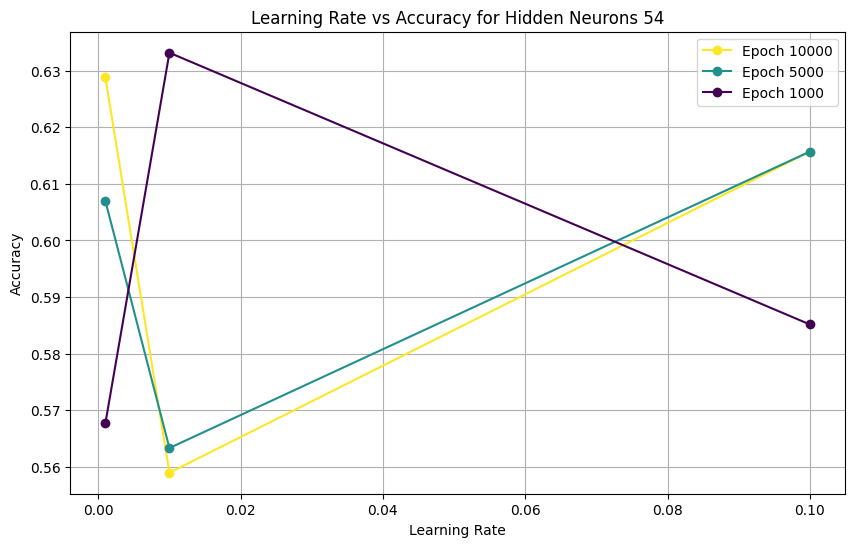

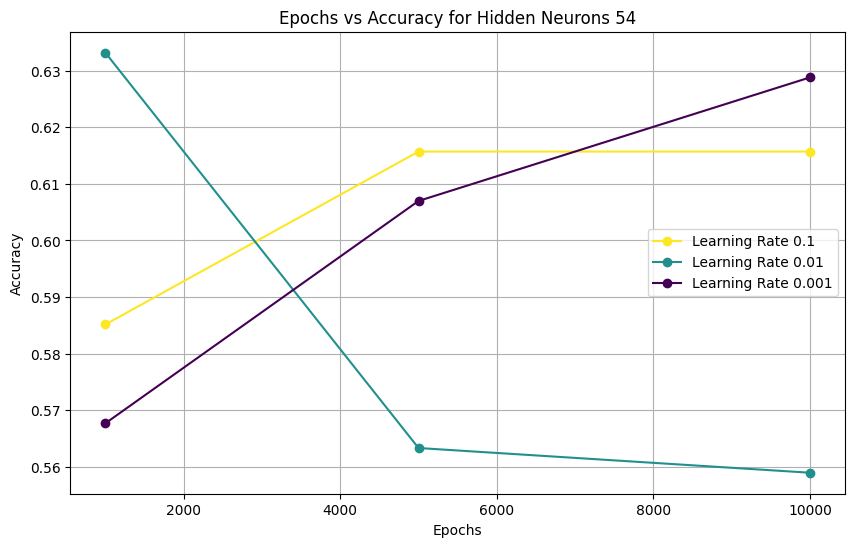

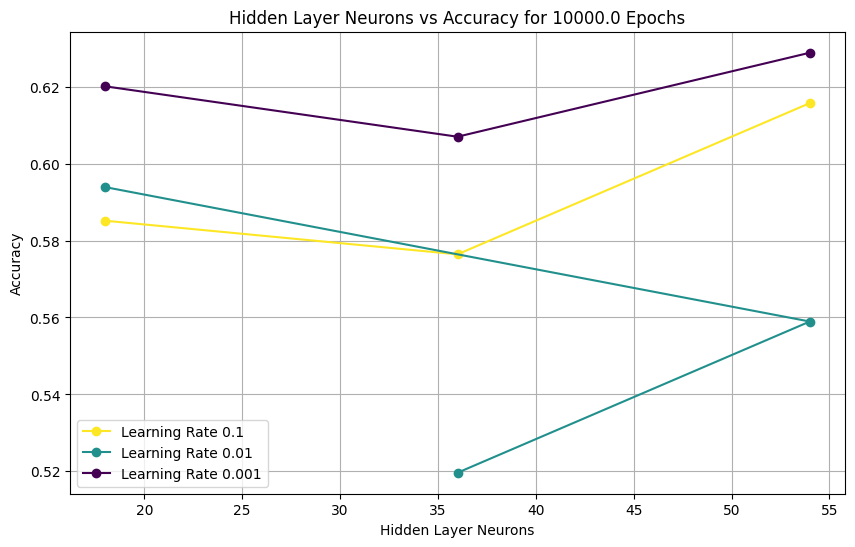

In [18]:
hidden_layer_size = 54
df = df.sort_values(by='Learning Rate', ascending=False)
# Filter the DataFrame to include only rows with the specified hidden layer size
df_filtered = df[df['Hidden Layer Neurons'] == hidden_layer_size]

# Create a line plot showing learning rate vs accuracy for different epochs
plt.figure(figsize=(10, 6))
colors = iter(plt.cm.viridis_r(np.linspace(0, 1, len(df_filtered['Epochs'].unique()))))

for epoch in df_filtered['Epochs'].unique():
    data = df_filtered[df_filtered['Epochs'] == epoch]
    plt.plot(data['Learning Rate'], data['Accuracy'], marker='o', label=f'Epoch {epoch}', color=next(colors))

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title(f'Learning Rate vs Accuracy for Hidden Neurons {hidden_layer_size}')
plt.legend()
plt.grid()
plt.show()

# Filter the DataFrame to include only rows with the specified hidden layer size
df_filtered = df[df['Hidden Layer Neurons'] == hidden_layer_size]

# Create a line plot showing epochs vs accuracy for different learning rates
plt.figure(figsize=(10, 6))
colors = iter(plt.cm.viridis_r(np.linspace(0, 1, len(df_filtered['Learning Rate'].unique()))))

for learning_rate in df_filtered['Learning Rate'].unique():
    data = df_filtered[df_filtered['Learning Rate'] == learning_rate]
    plt.plot(data['Epochs'], data['Accuracy'], marker='o', label=f'Learning Rate {learning_rate}', color=next(colors))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Epochs vs Accuracy for Hidden Neurons {hidden_layer_size}')
plt.legend()
plt.grid()
plt.show()

# Filter the DataFrame to include only rows with the specified epoch
df_filtered = df[df['Epochs'] == 10000]

# Create a line plot showing hidden layer neurons vs accuracy for different learning rates
plt.figure(figsize=(10, 6))
colors = iter(plt.cm.viridis_r(np.linspace(0, 1, len(df_filtered['Learning Rate'].unique()))))

for learning_rate in df_filtered['Learning Rate'].unique():
    data = df_filtered[df_filtered['Learning Rate'] == learning_rate]
    plt.plot(data['Hidden Layer Neurons'], data['Accuracy'], marker='o', label=f'Learning Rate {learning_rate}', color=next(colors))

plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Accuracy')
plt.title(f'Hidden Layer Neurons vs Accuracy for {df_filtered.iloc[0]["Epochs"]} Epochs')
plt.legend()
plt.grid()
plt.show()



# Evaluating Model

Initial Loss 3.6535756753070365


Iteration 1000: loss = 0.924339
Iteration 2000: loss = 0.912707
Iteration 3000: loss = 0.922208
Iteration 4000: loss = 0.949551
Iteration 5000: loss = 0.987984
Iteration 6000: loss = 1.027672
Iteration 7000: loss = 1.063092
Iteration 8000: loss = 1.091724
Iteration 9000: loss = 1.114372
Iteration 10000: loss = 1.133548
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.133548


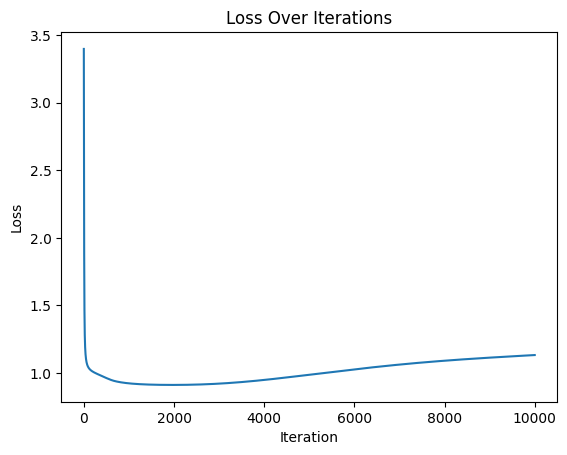

------------------------------------
Testing Data Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         9
           2       0.61      0.71      0.66        97
           3       0.52      0.59      0.55        93
           4       0.40      0.15      0.22        26
           5       0.00      0.00      0.00         4

   micro avg       0.56      0.56      0.56       229
   macro avg       0.25      0.24      0.24       229
weighted avg       0.51      0.56      0.53       229
 samples avg       0.56      0.56      0.56       229

Test Dataset
Test Accuracy: 0.5590


In [55]:
NN.set_activation_type('sigmoid')
NN.set_learning_rate(0.001)
NN.set_epochs(10000)
NN.set_optimizer_type('mini')
LR = 0.001
Max_iterations = 10000
np.random.seed(27)
loss = NN.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
y_pred = NN.predict(X_test_std)
print('------------------------------------')
print("Testing Data Report:")
print(classification_report(y_test, y_pred,zero_division=0))
print("Test Dataset")
testing_accuracy =  accuracy_score(y_test,y_pred)
print(f"Test Accuracy: {testing_accuracy:.4f}")


# Comparative Analysis of Multinomial Logistic Regression and Multilayer Perceptron Classification

## Introduction
```
This report presents a detailed comparative analysis of Multinomial Logistic Regression (MLR) and Multilayer Perceptron Classification (MLP) based on their respective accuracy scores. The accuracies achieved by these models on a machine learning task were 0.5721 for MLR and 0.5590 for MLP.
```
## Accuracy Comparison
```
Accuracy, a fundamental performance metric in classification tasks, measures the proportion of correctly predicted instances out of the total instances. In this analysis, we focus on the following aspects of the accuracy comparison:
```
### 1. Model Performance
```
- Multinomial Logistic Regression (MLR) achieved an accuracy of 0.5721. This indicates that the model correctly classified approximately 57.21% of the instances in the dataset.
- Multilayer Perceptron Classification (MLP), on the other hand, achieved an accuracy of 0.5590, meaning it correctly classified approximately 55.90% of the instances.
```
### 2. Implications of Accuracy Scores
```
The comparison of these accuracy scores provides insights into the relative performance of the two models. While MLR outperformed MLP in terms of accuracy, it is important to delve deeper into the technical aspects of these models to gain a better understanding of why this difference in performance exists.
```
## Technical Analysis

### Model Complexity
```
- MLR is a linear classification model. It assumes linear decision boundaries and relies on feature weights to make predictions.
- MLP is a neural network-based model with multiple hidden layers. It can capture non-linear relationships between features and targets.
```
### Feature Engineering
```
- MLR relies heavily on feature engineering. The quality of input features significantly impacts its performance.
- MLP can automatically learn hierarchical features. Feature engineering is still beneficial but not as critical.
```
### Interpretability
```
- MLR provides straightforward model interpretability. We can directly interpret the weights as feature importance.
- MLP's complex architecture makes it challenging to directly interpret the feature importance, as it involves non-linear transformations of the input data.
```
### Training Time
```
- MLR generally requires less training time. It is efficient in handling large datasets.
- MLP, especially deep architectures, can be time-consuming to train due to the complexity of neural networks.
```
### Handling Non-Linearity
```
- MLR is limited in its ability to capture non-linear relationships, making it less suitable for tasks with complex, non-linear dependencies.
- MLP excels at capturing non-linear patterns, making it a strong choice for tasks where non-linearity is prevalent.
```
## Conclusion
```
In conclusion, while MLR exhibited a slightly higher accuracy in the specific task at hand, this comparison showcases that the choice between these two models is highly dependent on the problem characteristics, data quality, and desired model complexity.

- Multinomial Logistic Regression is a preferable choice when the data exhibits linear relationships, and model interpretability is essential. It is particularly useful for well-engineered, linear problems.

- Multilayer Perceptron Classification is the model of choice for complex tasks where non-linear relationships dominate. It offers flexibility in modeling but may require more data and computational resources for training.

The accuracy comparison is just one aspect of model evaluation, and making the final model selection should consider other factors like interpretability, training time, and the nature of the data. In this specific task, MLR yielded a slightly higher accuracy, but the choice between these models should be made based on the specific characteristics and requirements of the problem at hand.
```

# Multiperceptron MultiLabel Classification

In [ ]:
data = pd.read_csv('WineQT.csv')
# print(data)
print(data.shape)
# Describe the dataset
description = data.describe()


In [ ]:
# Multiperceptron MultiLabel Classification
import numpy as np
import matplotlib.pyplot as plt

class MultiLabelPerceptronClassification:
    def __init__(self, input_layer_size, num_hidden_layers, hidden_layer_size, output_layer_size, learning_rate=0.001, activation_type='sigmoid', optimizer_type='batch',max_iterations=10000):
        self.learning_rate = learning_rate
        self.input_layer_size = input_layer_size
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.activation_type = activation_type
        self.optimizer_type = optimizer_type
        self.weights = self.initialize_weights()
        self.yHat = None
        self.activation_function = self.sigmoid
        self.activation_prime_function = self.sigmoid_prime
        self.max_iterations = max_iterations
        self.train_function = self.train_batch
        self.wandlog = False

    def initialize_weights(self):
        weights = []
        layer_sizes = [self.input_layer_size] + [self.hidden_layer_size] * self.num_hidden_layers + [self.output_layer_size]
        for i in range(1, len(layer_sizes)):
            weights.append(np.random.randn(layer_sizes[i - 1], layer_sizes[i]))
        return weights

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_prime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def tanh(self, z):
        return np.tanh(z)

    def tanh_prime(self, z):
        return 1 - np.square(np.tanh(z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_prime(self, z):
        return (z > 0).astype(int)

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_activation_type(self, activation_type):
        self.activation_type = activation_type
        self.set_activation_function()

    def set_optimizer_type(self, optimizer_type):
        self.optimizer_type = optimizer_type
        self.set_train_function()

    def set_activation_function(self):
        if self.activation_type == 'sigmoid':
            self.activation_function = self.sigmoid
            self.activation_prime_function = self.sigmoid_prime
        elif self.activation_type == 'relu':
            self.activation_function = self.relu
            self.activation_prime_function = self.relu_prime
        elif self.activation_type == 'tanh':
            self.activation_function = self.tanh
            self.activation_prime_function = self.tanh_prime

    def set_train_function(self):
        if self.optimizer_type == 'SGD':
            self.train_function = self.train_sgd
        elif self.optimizer_type == 'mini':
            self.train_function = self.train_mini_batch
        elif self.optimizer_type == 'batch':
            self.train_function = self.train_batch

    def set_hidden_layers(self,num_hidden_layers,hidden_layer_size):
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.weights = self.initialize_weights()

    def set_epochs(self,epochs):
        self.max_iterations = epochs

    def set_wandb(self,state):
        self.wandlog = state

    def forward_propagation(self, X):
        A = [X]
        Z = []
        for layer in range(0, self.num_hidden_layers):
            z = np.dot(A[layer], self.weights[layer])
            a = self.activation_function(z)
            Z.append(z)
            A.append(a)
        z = np.dot(A[self.num_hidden_layers],self.weights[self.num_hidden_layers])
        Z.append(z)
        self.yHat = self.softmax(Z[-1])
        A.append(self.yHat)
        self.activations = A
        self.weighted_sums = Z
        return self.yHat

    def backward_propagation(self, x, y):
        m = x.shape[0]
        output_error = np.multiply((self.activations[-1] - y),self.sigmoid_prime(self.weighted_sums[-1]))
        deltas = [output_error]
        for i in reversed(range(self.num_hidden_layers)):
            error = deltas[-1].dot(self.weights[i + 1].T)
            delta = error*self.activation_prime_function(self.weighted_sums[i])
            deltas.append(delta)
        deltas = list(reversed(deltas))
        gradients = []
        for i in range(self.num_hidden_layers + 1):
            gradient = self.activations[i].T.dot(deltas[i])
            gradients.append(gradient)
        return gradients
    

    def softmax(self, z):
        return np.exp(z - np.max(z)) / np.exp(z - np.max(z)).sum(axis=1, keepdims=True)
    
    def costFunction(self, X, y):
        self.y_Hat = self.forward_propagation(X)
        J = -np.sum(y*np.log(self.y_Hat))/len(X)
        return J

    def get_params(self):
        params = []
        for weight_matrix in self.weights:
            params.append(weight_matrix.ravel())
        return np.concatenate(params)

    def set_params(self, params):
        param_start = 0
        for i in range(len(self.weights)):
            weight_shape = self.weights[i].shape
            weight_size = weight_shape[0] * weight_shape[1]
            self.weights[i] = params[param_start:param_start + weight_size].reshape(weight_shape)
            param_start += weight_size

    def compute_gradients(self, X, y):
        self.forward_propagation(X)
        gradients = self.backward_propagation(X, y)
        gradient_params = []
        for weight_gradient in gradients:
            gradient_params.append(weight_gradient.ravel())
        return np.concatenate(gradient_params)

    def train_batch(self, X, y, learning_rate=0.01, max_iterations=10000):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        loss = self.costFunction(X, y)
        print('Initial Loss',loss)
        # wandb.log({"Batch-loss": loss})
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            gradients = self.compute_gradients(X, y)
            loss = self.costFunction(X, y)
            self.J.append(loss)
            self.set_params(self.get_params() - lr * gradients)
            k += 1
            # if k % 250 == 0:
            #     print("Epoch %d: loss = %f" % (k, loss))
            #     # wandb.log({"Batch-loss": loss})
        # print("Operation Batch GD terminated successfully.")
        # print("---------Iterations: %d" % k)
        # print("---------Final loss function: %f" % loss)
        # self.plot_loss()
        return loss
    
    def train_sgd(self, X, y,learning_rate=0.01,max_iterations=10000):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        for epoch in range(max_iterations):
                np.random.seed(42)
                idx = np.random.randint(len(X))
                np.random.seed(27)
                loss = self.costFunction(X[idx:idx+1],y[idx:idx+1])
                self.J.append(loss)
                gradients = self.compute_gradients(X[idx:idx+1], y[idx:idx+1])
                self.set_params(self.get_params() - self.learning_rate * gradients)
                # if (epoch % 1000 == 0):
                #     print("Epoch %d: loss = %f" % (epoch, loss))
        # print("Operation SGD terminated successfully.")
        return loss
    
    def train_mini_batch(self, X, y, learning_rate=0.01, max_iterations=10000, batch_size=32):
        self.J = []
        self.set_epochs(max_iterations)
        self.set_learning_rate(learning_rate)
        loss = self.costFunction(X, y)
        print('Initial Loss', loss)
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            for j in range(0, len(X), batch_size):
                batch_indices = indices[j:j+batch_size]
                gradients = self.compute_gradients(X[batch_indices], y[batch_indices])
                self.set_params(self.get_params() - lr * gradients)
            k += 1
            loss = self.costFunction(X, y)
            self.J.append(loss)
            # if k % 1000 == 0:
            #     print("Iteration %d: loss = %f" % (k, loss))
        # print("Operation terminated successfully.")
        # print("         Iterations: %d" % k)
        # print("         Final loss function: %f" % loss)
        # self.plot_loss()
        return loss

    def plot_loss(self):
        if not self.J:
            print("Loss array is empty")
        else:
            plt.plot(self.J)
            plt.title('Loss Over Iterations')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()

    def predict(self, X):
        yHat = self.forward_propagation(X)
        binary_predictions = (yHat>0.2).astype(int)
        return binary_predictions


LR = 0.0001
Max_iterations = 5000
np.random.seed(27)
NN = MultiLabelPerceptronClassification(input_layer_size=12, num_hidden_layers=1, hidden_layer_size=18,output_layer_size=6, learning_rate=LR, activation_type='relu', optimizer_type='batch')
loss = NN.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)